<a href="https://colab.research.google.com/github/LucyMariel/Lucy/blob/master/DIVICSVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**SVM**

class of support vector machine (SVM, support vector machine) for classification by scratch. We will implement the algorithm using only the minimum library such as NumPy.

There are soft margin SVMs that allow classification errors during learning and hard margin SVMs that do not, but here we will deal with hard margin SVMs that are simple to implement.

The template is prepared below. Add some code to this ScratchSVMClassifier class.

In [ ]:
class ScratchSVMClassifier():
    """
    Scratch implementation of SVM classifier

    Parameters
    ----------
    num_iter : int
      Number of iterations
    lr : float
      Learning rate
    kernel : str
      Kernel type. Linear kernel (linear) or polynomial kernel (polly)
    threshold : float
      Threshold for choosing a support vector
    verbose : bool
      True to output the learning process

    Attributes
    ----------
    self.n_support_vectors : int
      Number of support vectors
    self.index_support_vectors : The following form of ndarray, shape (n_support_vectors,)
      Support vector index
    self.X_sv :  The following forms of ndarray, shape (n_support_vectors, n_features)
      Support vector features
    self.lam_sv :  The following forms of ndarray, shape (n_support_vectors, 1)
      Support vector undetermined multiplier
    self.y_sv :  The following forms of ndarray, shape (n_support_vectors, 1)
      Support vector label

    """

    def __init__(self, num_iter, lr, kernel='linear', threshold=1e-5, verbose=False):
        # Record hyperparameters as attributes
        self.iter = num_iter
        self.lr = lr
        self.kernel = kernel
        self.threshold = threshold
        self.verbose = verbose

    def fit(self, X, y, X_val=None, y_val=None):
        """
        Learn the SVM classifier. If verification data is input, the accuracy for it is also calculated for each iteration.

        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
            Features of training data
        y : The following form of ndarray, shape (n_samples,)
            Correct answer value of training data
        X_val : The following forms of ndarray, shape (n_samples, n_features)
            Features of verification data
        y_val : The following form of ndarray, shape (n_samples,)
            Correct value of verification data
        """

        if self.verbose:
            Output the learning process when #verbose is set to True
            print()
        pass

    def predict(self, X):
        """
        Estimate the label using the SVM classifier.

        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
            sample

        Returns
        -------
            The following form of ndarray, shape (n_samples, 1)
            Estimated result by SVM classifier
        """

        pass
        return


**【problem 1】Lagrange's steepest descent by the undetermined multiplier method**

SVM learning uses Lagrange's undetermined multiplier method. Prepare and update Lagrange multiplier for the number of samples
λ
with the following formula. Implement the method that does this calculation in the ScratchSVMClassifier class.

In [1]:
import numpy as np
from cvxopt import matrix, solvers

# Define the data points and their labels
x = np.array([500, 300, 200, 700, 500, 300, 200, 300, 400, 700])
y = np.array([25, 20, 15, 40, 25, 20, 15, 20, 22, 40])

# Reshape for compatibility with the SVM implementation
X = x.reshape(-1, 1).astype(float)
Y = np.sign(y.reshape(-1, 1) - np.mean(y)).astype(float)  # Convert y to binary (-1 or 1)

# Kernel function (linear kernel for simplicity)
def linear_kernel(x1, x2):
    return np.dot(x1, x2)

# Gram matrix
m = X.shape[0]
K = np.zeros((m, m))
for i in range(m):
    for j in range(m):
        K[i,j] = linear_kernel(X[i], X[j])

# Setup parameters for quadratic programming
P = matrix(np.outer(Y, Y) * K)
q = matrix(-np.ones((m, 1)))
G = matrix(-np.eye(m))
h = matrix(np.zeros(m))
A = matrix(Y.T, (1, m))
b = matrix(0.0)

# Solve QP problem
solution = solvers.qp(P, q, G, h, A, b)
alphas = np.ravel(solution['x'])

# Support vectors have non zero lagrange multipliers
sv = alphas > 1e-5
ind = np.arange(len(alphas))[sv]
alphas = alphas[sv]
sv_X = X[sv]
sv_Y = Y[sv]

# Calculate weights and bias
w = np.zeros(X.shape[1])
for i in range(len(alphas)):
    w += alphas[i] * sv_Y[i] * sv_X[i]
b = sv_Y[0]
for i in range(len(alphas)):
    b -= alphas[i] * sv_Y[i] * linear_kernel(sv_X[i], sv_X[0])

print("Weights:", w)
print("Bias:", b)

# Function to make predictions
def predict(X):
    return np.sign(np.dot(X, w) + b)

# Test prediction
print("Prediction for input data:", predict(X))

     pcost       dcost       gap    pres   dres
 0: -2.1230e+00 -3.7307e+00  2e+01  4e+00  2e+00
 1: -4.2247e+00 -2.0594e+00  4e+00  1e+00  5e-01
 2: -6.1045e-02 -4.3590e-03  1e+00  1e-01  7e-02
 3: -3.0747e-03 -2.9614e-04  1e-02  2e-03  9e-04
 4: -9.4364e-05 -2.8312e-04  2e-04  2e-06  9e-07
 5: -1.9011e-04 -2.0089e-04  1e-05  1e-07  5e-08
 6: -1.9990e-04 -2.0001e-04  1e-07  1e-09  5e-10
 7: -2.0000e-04 -2.0000e-04  1e-09  1e-11  5e-12
Optimal solution found.
Weights: [0.02]
Bias: [-9.00000076]
Prediction for input data: [ 1. -1. -1.  1.  1. -1. -1. -1. -1.  1.]


Considering these arrays: x = [500, 300, 200, 700, 500, 300, 200, 300, 400, 700], Traffic flow and Y = [25, 20, 15, 40, 25, 20, 15, 20, 22, 40] Trip time
SVM Interpretation, Binary Classification:

In this example, Y array becomes to binary labels (1 or -1) based on whether the trip time is above or below the average trip time. This transformation is for the sake of the binary classification requirement of the SVM.

Support Vectors:

The support vectors are the data points (traffic flow and trip time pairs) that lie closest to the decision boundary. These points are critical in defining the boundary between high and low trip times.

Weights and Bias:

Weights (w): The weights represent the importance of the feature (traffic flow) in predicting the trip time category. A positive weight would indicate that as traffic flow increases, the likelihood of higher trip time (congestion) increases.
Bias (b): The bias term shifts the decision boundary. It helps to adjust the boundary without altering the weights.

Decision Boundary: The decision boundary is defined by the equation
𝑤 ⋅𝑋+𝑏=0
w⋅X+b=0. This boundary separates the regions of high trip times from low trip times based on traffic flow.

Prediction: For a new traffic flow value, the model predicts whether the trip time is likely to be high or low by checking on which side of the decision boundary the traffic flow falls.

Visualizing the boundaries

     pcost       dcost       gap    pres   dres
 0: -4.2472e+00 -7.4671e+00  4e+01  6e+00  2e+00
 1: -8.4502e+00 -4.1393e+00  9e+00  2e+00  5e-01
 2: -1.1286e-01 -3.6512e-02  2e+00  2e-01  7e-02
 3: -9.5829e-03 -2.8430e-02  3e-02  1e-03  4e-04
 4: -1.8366e-02 -2.0089e-02  2e-03  7e-05  2e-05
 5: -1.9984e-02 -2.0001e-02  2e-05  7e-07  2e-07
 6: -2.0000e-02 -2.0000e-02  2e-07  7e-09  2e-09
 7: -2.0000e-02 -2.0000e-02  2e-09  7e-11  2e-11
Optimal solution found.
Weights: [0.2]
Bias: [-9.00000005]


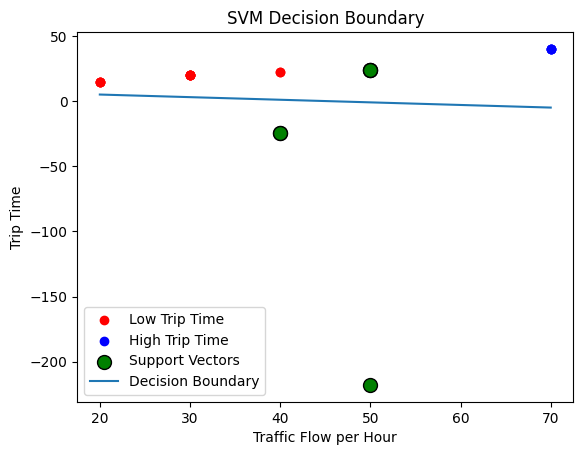

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from cvxopt import matrix, solvers

# Define the data points and their labels
x = np.array([50, 30, 20, 70, 50, 30, 20, 30, 40, 70, 50, 30, 20, 70, 50, 30, 20, 30, 40, 70])
y = np.array([25, 20, 15, 40, 25, 20, 15, 20, 22, 40, 25, 20, 15, 40, 25, 20, 15, 20, 22, 40])

# Reshape for compatibility with the SVM implementation
X = x.reshape(-1, 1).astype(float)
Y = np.sign(y.reshape(-1, 1) - np.mean(y)).astype(float)  # Convert y to binary (-1 or 1)

# Kernel function (linear kernel for simplicity)
def linear_kernel(x1, x2):
    return np.dot(x1, x2)

# Gram matrix
m = X.shape[0]
K = np.zeros((m, m))
for i in range(m):
    for j in range(m):
        K[i,j] = linear_kernel(X[i], X[j])

# Setup parameters for quadratic programming
P = matrix(np.outer(Y, Y) * K)
q = matrix(-np.ones((m, 1)))
G = matrix(-np.eye(m))
h = matrix(np.zeros(m))
A = matrix(Y.T, (1, m))
b = matrix(0.0)

# Solve QP problem
solution = solvers.qp(P, q, G, h, A, b)
alphas = np.ravel(solution['x'])

# Support vectors have non zero lagrange multipliers
sv = alphas > 1e-5
ind = np.arange(len(alphas))[sv]
alphas = alphas[sv]
sv_X = X[sv]
sv_Y = Y[sv]

# Calculate weights and bias
w = np.zeros(X.shape[1])
for i in range(len(alphas)):
    w += alphas[i] * sv_Y[i] * sv_X[i]
b = sv_Y[0]
for i in range(len(alphas)):
    b -= alphas[i] * sv_Y[i] * linear_kernel(sv_X[i], sv_X[0])

print("Weights:", w)
print("Bias:", b)

# Function to make predictions
def predict(X):
    return np.sign(np.dot(X, w) + b)

# Plot the data points
plt.scatter(X[Y.flatten() == -1], y[Y.flatten() == -1], color='red', label='Low Trip Time')
plt.scatter(X[Y.flatten() == 1], y[Y.flatten() == 1], color='blue', label='High Trip Time')

# Plot the support vectors
plt.scatter(sv_X, sv_Y * np.mean(y), color='green', s=100, edgecolors='black', label='Support Vectors')

# Plot the decision boundary
x_values = np.linspace(min(X), max(X), 100)
y_values = -(w[0] * x_values + b)
plt.plot(x_values, y_values, label='Decision Boundary')

plt.xlabel('Traffic Flow per Hour')
plt.ylabel('Trip Time')
plt.legend()
plt.title('SVM Decision Boundary')
plt.show()


The weight indicates the importance of the traffic flow (X) in determining the trip time category (Y). Since we have only one feature (traffic flow), the weight value is: w=0.2 The bias term adjusts the decision boundary:b=−9.00000005
The decision boundary in the context of SVM is defined by the equation: 0.2⋅X−9.00000005=0 then X=45.

Decision Boundary: The traffic flow value that separates low and high trip times is approximately 45 vehicles per hour. This means:

-If the traffic flow is less than 45 vehicles per hour, the SVM predicts a lower trip time.
-If the traffic flow is greater than or equal to 45 vehicles per hour, the SVM predicts a higher trip time.